In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyoz.potentials import soft_depletion
import pyoz.unit as u

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large',
})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')

%matplotlib inline

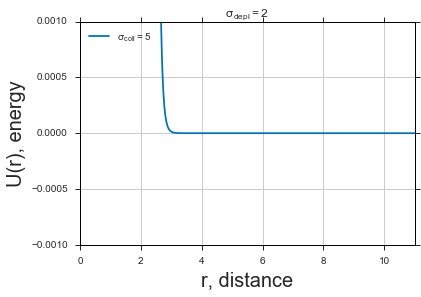

In [2]:
sig_d = 2
n = 36
h = 1.01818

r = np.arange(0, 15, 0.01)

plt.title(r'$\sigma_{depl} = 2$')

sig_c = 2.2
sig_d = 1.0
rho_d = 0.0
U = soft_depletion(r, eps=1, sig_c=sig_c, sig_d=sig_d, n=n, rho_d=rho_d)
plt.plot(r, U, label=r'$\sigma_{coll} = 5$')

# sig_c = 8
# U = soft_depletion(r, eps=1, sig_c=sig_c, sig_d=sig_d, n=n, rho_d=rho_d)
# plt.plot(r, U, label=r'$\sigma_{coll} = 8$')

# sig_c  = 10
# U = soft_depletion(r, eps=1, sig_c=sig_c, sig_d=sig_d, n=n, rho_d=rho_d)
# plt.plot(r, U, label=r'$\sigma_{coll} = 10$')

plt.xlim(0, sig_c*5)
plt.ylim(U.min()-1, 1)

plt.xlabel('r, distance', fontsize=20)
plt.ylabel('U(r), energy', fontsize=20)

plt.legend(loc='best')
plt.savefig('depl.pdf', bbox_inches='tight')

In [3]:
y = [4.18, 3.95, 3.75, 3.72, 3.7, 3.67, 3.64, 3.63, 3.64, 4.4, 4.4]

In [4]:
def number_densities(SiO2_wt_perc):
    # SiO2_mol_wt = 60.08 * u.gram / u.mole
    # rho_solution = 1 * u.gram / u.centimeter**3
    # colloid_rho = rho_solution * (SiO2_wt_perc/100) / SiO2_mol_wt * Na
    solution_density = 1

    # sol_dens = () / (() + ())
    return 6 / np.pi * (SiO2_wt_perc / 100) / (2.65 / solution_density)


def LR_parameters(colloid_diameter, NaCl_wt_perc, Z):
    NaCl_mol_wt = 58.44 * u.gram / u.mole
    rho_solution = 1 * u.gram / u.centimeter**3

    # NaCl_conc = NaCl_wt_perc * 10.0 / NaCl_mol_wt  # mol/Liter
    # NaCl_conc = rho_solution * (NaCl_wt_perc/100) / NaCl_mol_wt
    NaCl_conc = (NaCl_wt_perc/100) *10 / 58.4
    # ionic_strength = NaCl_conc.value_in_unit(u.moles / u.liter)

    # lambda_d = 0.304 / np.sqrt(ionic_strength) * u.nanometers
    lambda_d = 0.304 / np.sqrt(NaCl_conc) * u.nanometers
    lambda_b = 0.70 * u.nanometers


    l_debye = lambda_d / colloid_diameter  # Reduced units
    l_bjerrum = lambda_b / colloid_diameter  # Reduced units


    # Charge density of glass is given for a few different pH values:
    # http://physics.nyu.edu/grierlab/charge6c/
    q_density = Z * u.elementary_charge / u.micrometers**2
    colloid_area = np.pi * colloid_diameter**2
    colloid_q = q_density * colloid_area

    #Equation 4: Bollinger, 2016 paper.
    # A/kT actually
    A = colloid_q**2 * l_bjerrum / (1 + 0.50 / l_debye)**2

    # TODO: Is there another unit reduction necessary here?
    A = A.value_in_unit(u.elementary_charge**2)
    return A, l_debye


def SALR(r, eps, m, n, A, l_debye):
    SR = 4 * r**(-m)
    SA = -4 * eps * r**(-n)
    LR = A * np.exp(-(r - 1) / l_debye)
    return SR + SA + LR

In [5]:
def pot(r, Z):
    d = 40 * u.nanometer
    NaCl_wt_perc = 1
    eps = 2.46345
    m = 50
    n = 18
    A, l_debye = LR_parameters(colloid_diameter=d,  NaCl_wt_perc=NaCl_wt_perc, Z=Z)
    return SALR(r=r, eps=eps, m=m, n=n, A=A, l_debye=l_debye)

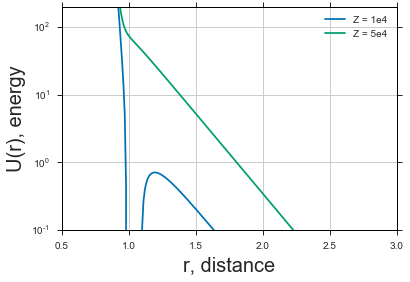

In [21]:
import pyoz as oz
foo = oz.System()
r = foo.r


U = pot(r, 1e4)
plt.plot(r, U, label='Z = 1e4')

U = pot(r, 5e4)
plt.plot(r, U, label='Z = 5e4')
plt.xlim(0.5, 3)
plt.ylim(0.1, 200)
plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.xlabel('r, distance', fontsize=20)
plt.ylabel('U(r), energy', fontsize=20)
plt.savefig('salr_pot.pdf', bbox_inches='tight')

In [7]:
U.min()

-7.1604312110215231e-17

In [8]:
r.shape

(4095,)

In [9]:
pot(r, 1e4)

array([  4.00000000e+100,   3.57447602e+085,   5.61737694e+076, ...,
        -9.52273194e-029,  -9.48095037e-029,  -9.43936226e-029])

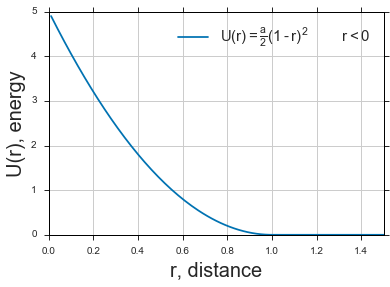

In [10]:
%matplotlib inline
plt.plot(r, oz.dpd(r, 10), label=r'$U(r) = \frac{a}{2}(1-r)^2$        $r < 0$')

plt.legend(fontsize=15)
plt.xlabel('r, distance', fontsize=20)
plt.ylabel('U(r), energy', fontsize=20)
plt.xlim(0, 1.5)
plt.ylim(0, 5)
plt.savefig('dpd.pdf', bbox_inches='tight')